In [43]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

<h2>Setup</h2>

In [44]:
btc_df = pd.read_csv('C:/Users/Thomas/Desktop/Bitcoin_Data/2_Minutes_BTC/btcFeature.csv')

shift = -1
random_state = 0
btc_df.Change = btc_df.Change.shift(shift)
btc_df = btc_df.dropna()

In [45]:
btc_df.head(5)

,Unnamed: 0,Change,NoOfTweets,Price,Sentiment,TimeStamp,Volume
0,0.0,176.122618,5479,10895.972636,0.131372,1517006461,101879.724252
1,0.0,15.603722,5089,11103.856483,0.165591,1517010121,102439.846847
2,0.0,16.355975,5006,11190.297205,0.174403,1517013721,103800.678995
3,0.0,304.134408,4817,11053.218631,0.166817,1517017321,102671.102925
4,0.0,-109.563939,4647,11212.309112,0.150134,1517020922,101054.829766


<h2>Linear Regression</h2>

In [46]:
lm_1 = LinearRegression()

X_1 = btc_df['Sentiment']
Y_1 = btc_df['Change']

X_1 = X_1.values.reshape(len(X_1), 1)
Y_1 = Y_1.values.reshape(len(Y_1), 1)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=random_state)

lm_1.fit(X_train_1, Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

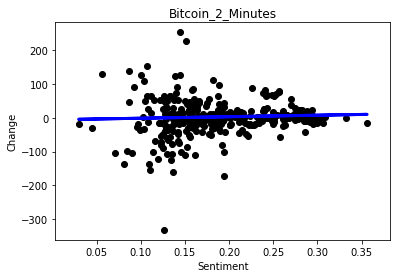

In [47]:
Y_pred_1 = lm_1.predict(X_test_1)
plt.scatter(X_test_1, Y_test_1,  color='black')
plt.plot(X_test_1, Y_pred_1, color='blue', linewidth=3)
plt.title('Bitcoin_2_Minutes')
plt.xlabel('Sentiment')
plt.ylabel('Change')
plt.show()

In [48]:
print('Coefficients: \n', lm_1.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test_1, Y_pred_1))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test_1, Y_pred_1))

error_1 = np.mean(Y_pred_1 != Y_test_1)
print(error_1)

Coefficients: 
 [[ 44.79426488]]
Mean squared error: 2674.27
Variance score: 0.00
1.0


<h2>Multi Linear Regression</h2>

In [49]:
lm_1 = LinearRegression()

X_1 = btc_df[['Sentiment', 'Volume', 'NoOfTweets']]
Y_1 = btc_df['Change']

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.33, random_state=random_state)

model = sm.OLS(Y_1, X_1).fit()
predictions = model.predict(X_1) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.504
Date:                Fri, 20 Apr 2018   Prob (F-statistic):             0.0576
Time:                        10:18:53   Log-Likelihood:                -9874.3
No. Observations:                1815   AIC:                         1.975e+04
Df Residuals:                    1812   BIC:                         1.977e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sentiment     24.7857     10.295      2.407      0.016       4.594      44.978
Volume     -1.808e-05   2.07e-05     -0.873      0.383   -5.87e-05    2.25e-05
NoOfTweets -7.478e-05      0.000     -0.288      0.773      -0.001       0.000
==============================================================================
Omnibus:                      448.952   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12601.488
Skew:                           0.523   Prob(JB):                         0.00
Kurtosis:                      15.866   Cond. No.                     7.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model = lm_1.fit(X_1,Y_1)
predictions = lm_1.predict(X_1)
print(X_1[0:5])
print(predictions[0:5])

   Sentiment         Volume  NoOfTweets
0   0.131372  101879.724252        5479
1   0.165591  102439.846847        5089
2   0.174403  103800.678995        5006
3   0.166817  102671.102925        4817
4   0.150134  101054.829766        4647
[-0.73502803  1.16652617  1.67261664  1.19988971  0.20565709]


In [51]:
lm_1.score(X_1,Y_1)

0.0031331132449454735

<h2>Decision Tree</h2>

In [52]:
dt = tree.DecisionTreeRegressor(criterion="friedman_mse",max_leaf_nodes=2, min_samples_leaf=50, max_depth=150)

X = btc_df[['Sentiment', 'Volume', 'NoOfTweets']]
Y = btc_df['Change']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

dt.fit(X_train, Y_train)

score = cross_val_score(dt, X_test, Y_test)

dt_score = dt.score(X_test, Y_test)
print(score)
print(dt_score)

[-0.05496402 -0.00614583  0.01545075]
-0.00642132667758


<h2>Random Forests</h2>

In [53]:
rf = RandomForestRegressor(max_leaf_nodes=2, min_samples_leaf=50, max_depth=150)

rf.fit(X_train, Y_train)

score = cross_val_score(rf, X_test, Y_test)

rf_score = rf.score(X_test, Y_test)

print(score)
print(rf_score)

[-0.05510015 -0.02134646 -0.00394536]
0.00371707101319
